
<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
Digital Image Processing <br>
<font color=2565AE size=5>
Department Of Mathematical Sciences <br>
Spring 2025<br>
<font color=3C99D size=5>
Assignment 4 <br>
</div>


---



### Full Name : Leili Motahari
### Student Number : 99171214
___

# Dilation and Erosion

In [5]:
import numpy as np
# def dilate(image, structuring_element):
# ##################################################
# ################### YOUR CODES ###################

# ##################################################


def dilate(
    image: np.ndarray,
    structuring_element: np.ndarray
) -> np.ndarray:

    img_h, img_w = image.shape
    se_h, se_w = structuring_element.shape
    pad_h, pad_w = se_h // 2, se_w // 2

    padded = np.pad(
        image,
        pad_width=((pad_h, pad_h), (pad_w, pad_w)),
        mode='constant',
        constant_values=0
    )

    dilated = np.zeros_like(image, dtype=np.uint8)

    for i in range(img_h):
        for j in range(img_w):
            region = padded[i : i + se_h, j : j + se_w]
            if np.any(region[structuring_element == 1] == 1):
                dilated[i, j] = 1

    return dilated



In [6]:
# def erode(image, structuring_element):
# ##################################################
# ################### YOUR CODES ###################

# ##################################################


def erode(
    image: np.ndarray,
    structuring_element: np.ndarray
) -> np.ndarray:

    img_h, img_w = image.shape
    se_h, se_w = structuring_element.shape
    pad_h, pad_w = se_h // 2, se_w // 2

    padded = np.pad(
        image,
        pad_width=((pad_h, pad_h), (pad_w, pad_w)),
        mode='constant',
        constant_values=0
    )

    eroded = np.zeros_like(image, dtype=np.uint8)

    for i in range(img_h):
        for j in range(img_w):
            region = padded[i : i + se_h, j : j + se_w]
            if np.all(region[structuring_element == 1] == 1):
                eroded[i, j] = 1

    return eroded


## Noise Reduction

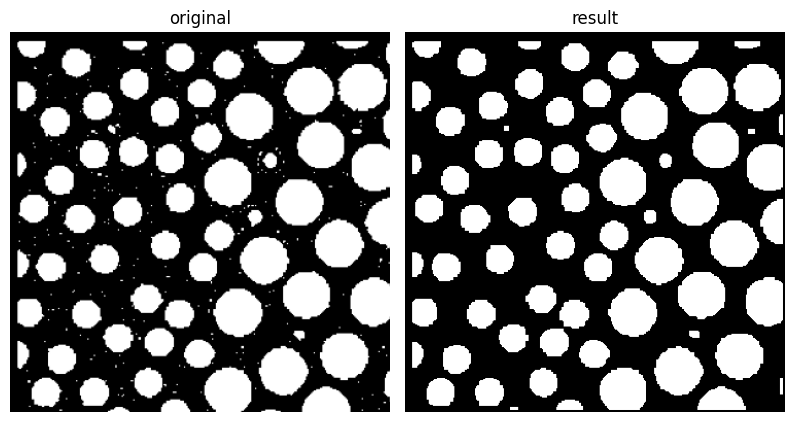

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
img_pil = Image.open('noisy_image.png').convert('L')
img_array = np.array(img_pil)
threshold = 128
binary = (img_array > threshold).astype(np.uint8)
se = np.ones((5, 5), dtype=np.uint8)



#(Opening)
eroded = erode(binary, se)
opened = dilate(eroded, se)

#(Closing)
dilated = dilate(opened, se)
closed = erode(dilated, se)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.title('original')
plt.imshow(img_pil, cmap='gray')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.title('result')
plt.imshow(closed, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## Parallel Vertical Lines

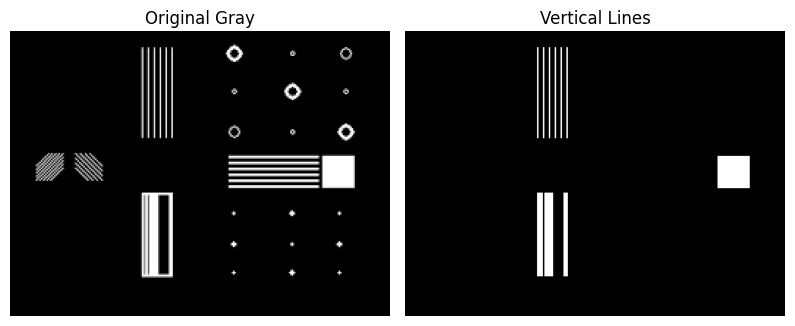

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_gray = cv2.imread('Q2.png', cv2.IMREAD_GRAYSCALE)

_, img_bin = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)

kernel_vertical = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 15))

eroded = cv2.erode(img_bin, kernel_vertical, iterations=1)
vertical_lines = cv2.dilate(eroded, kernel_vertical, iterations=1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Original Gray')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.title('Vertical Lines')
plt.imshow(vertical_lines, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


## Parallel Horizontal Lines

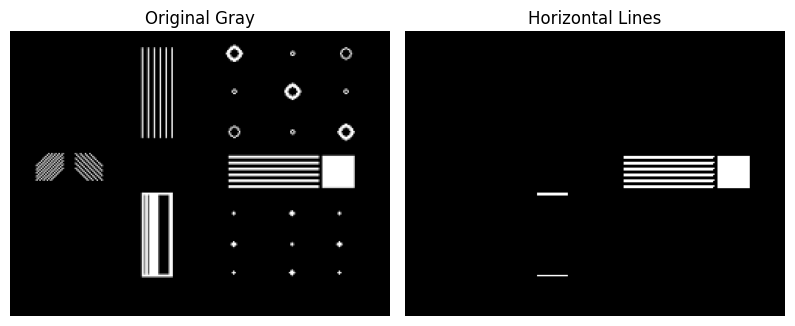

In [27]:
_, img_bin = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)

kernel_horizontal = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 1))

eroded_horiz = cv2.erode(img_bin, kernel_horizontal, iterations=1)
horizontal_lines = cv2.dilate(eroded_horiz, kernel_horizontal, iterations=1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Original Gray')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.title('Horizontal Lines')
plt.imshow(horizontal_lines, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


## Edge Detecting

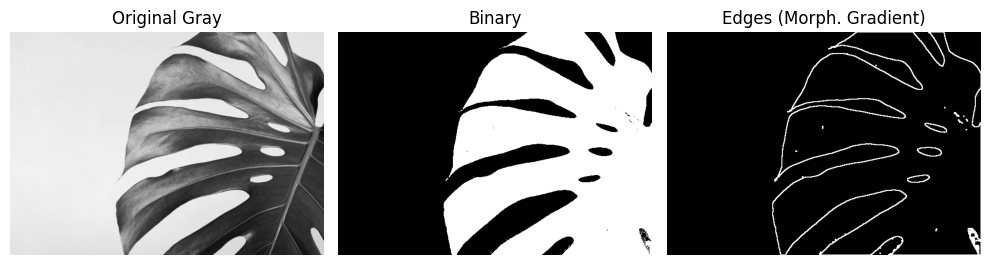

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

leaf_image = cv2.imread("leaf.jpg", cv2.IMREAD_GRAYSCALE)

threshold = 210
binary = (leaf_image < threshold).astype(np.uint8)
cv2.imwrite("leaf_binary.png", binary * 255)

se = np.ones((3, 3), dtype=np.uint8)

dilated = dilate(binary, se)
eroded  = erode(binary, se)
edges   = (dilated - eroded).clip(0, 1)

cv2.imwrite("leaf_edges.png", edges * 255)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("Original Gray")
plt.imshow(leaf_image, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Binary")
plt.imshow(binary, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Edges (Morph. Gradient)")
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


# Counting Coins

In [36]:
path = "coins.png"
coins = cv2.imread(path)

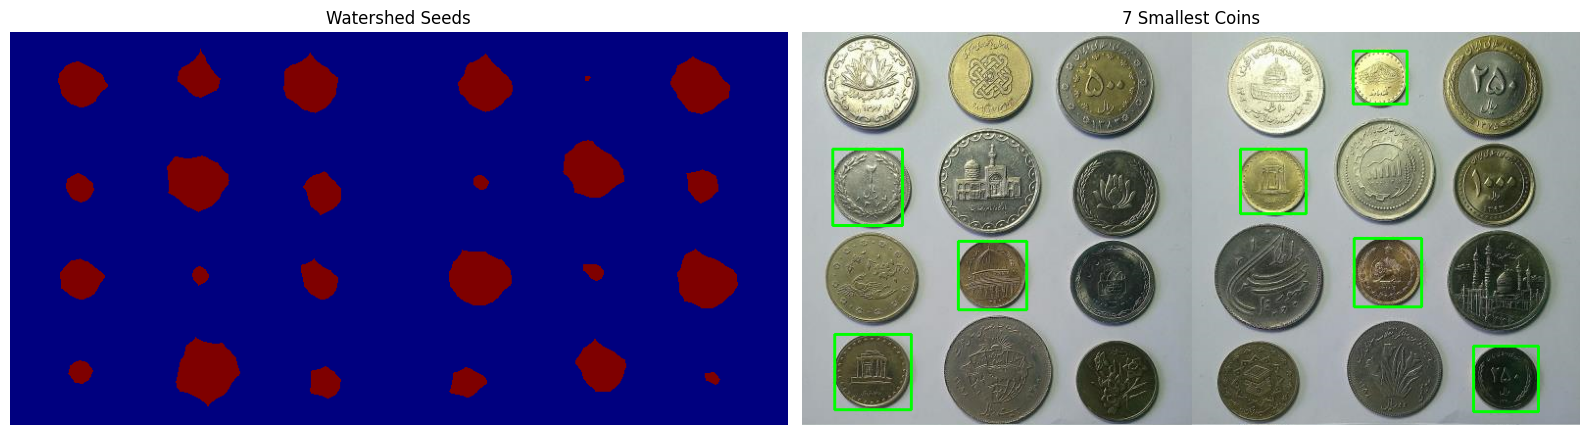

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('coins.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(
    blurred, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 5, 1
)

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
gold_mask = cv2.inRange(hsv, np.array([15, 50, 50]), np.array([40, 255, 255]))
mask = cv2.bitwise_or(thresh, gold_mask)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

sure_bg = cv2.dilate(mask, kernel, iterations=3)
dist = cv2.distanceTransform(mask, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, 0)
sure_fg = sure_fg.astype(np.uint8)
unknown = cv2.subtract(sure_bg, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(image, markers)

coins = []
for label in np.unique(markers):
    if label <= 1:
        continue
    coin_mask = np.zeros_like(gray, dtype=np.uint8)
    coin_mask[markers == label] = 255
    contours, _ = cv2.findContours(coin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        cnt = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(cnt)
        if area > 400:
            coins.append((area, cnt))

coins.sort(key=lambda x: x[0])
smallest = coins[:7]

output = image.copy()
for idx, (_, cnt) in enumerate(smallest, start=1):
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # cv2.putText(output, str(idx), (x, y - 10),
    #             cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)


plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Watershed Seeds')
plt.imshow(sure_fg, cmap='jet')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('7 Smallest Coins')
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


# Shape Descriptors

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Load the Images

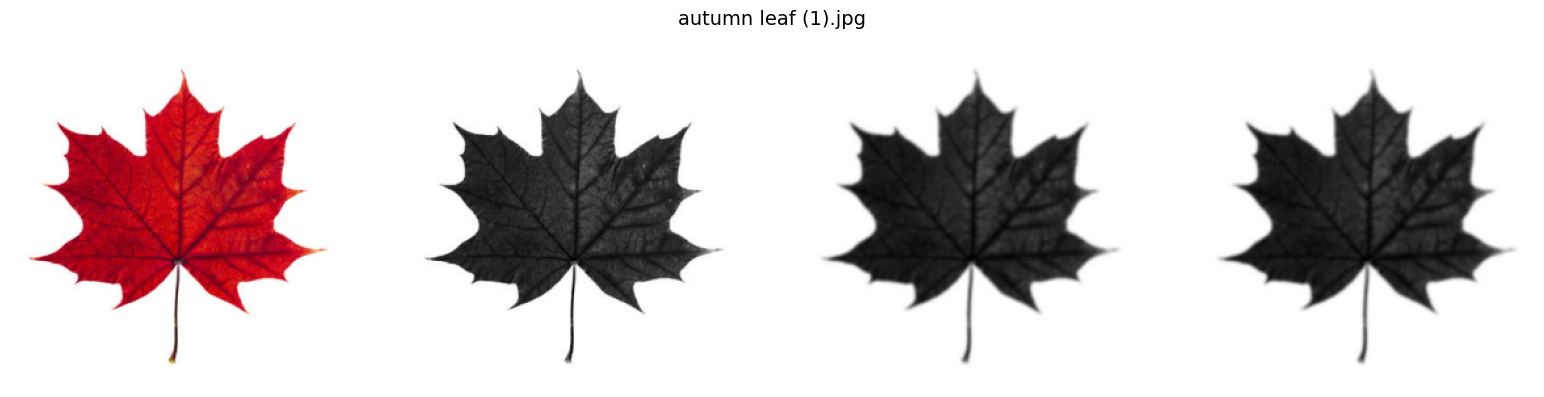

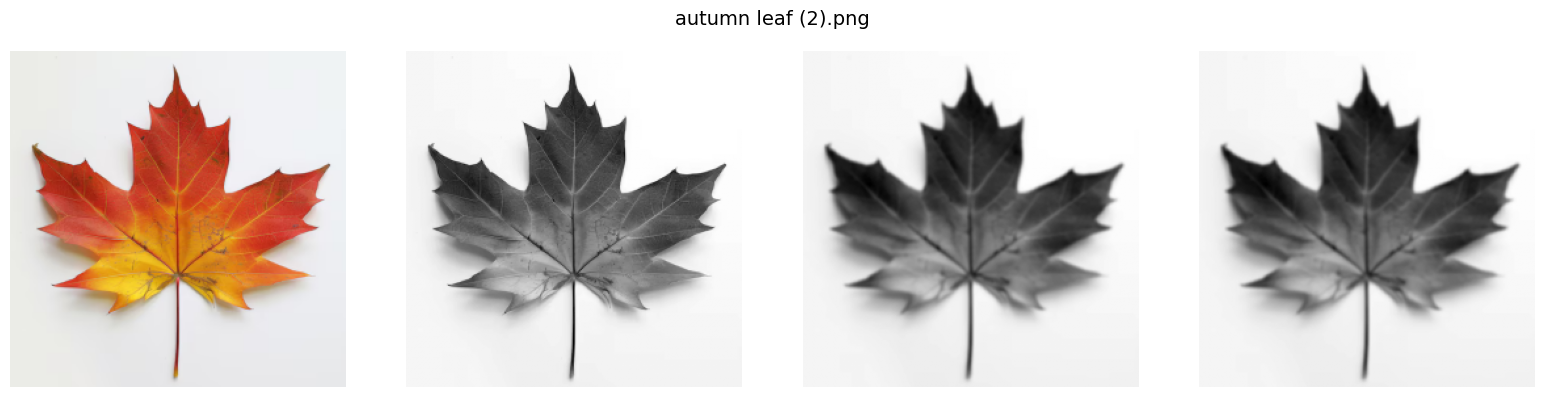

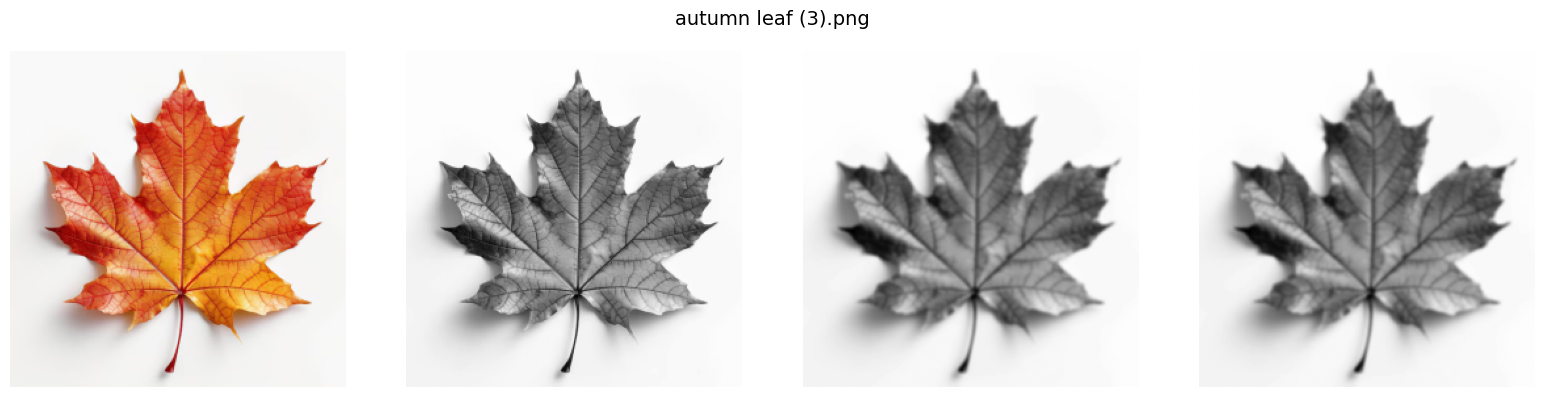

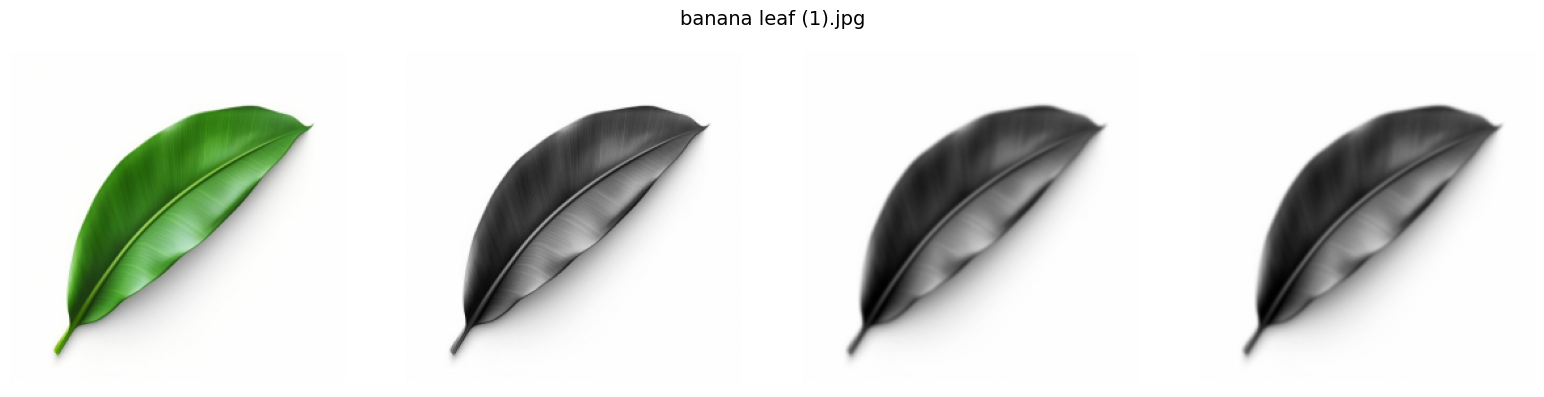

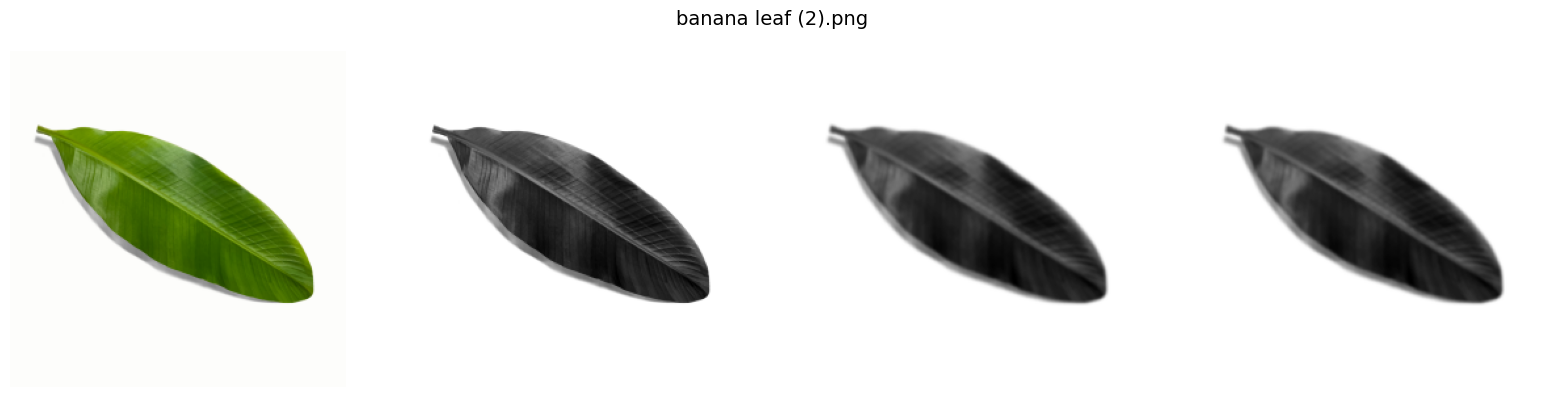

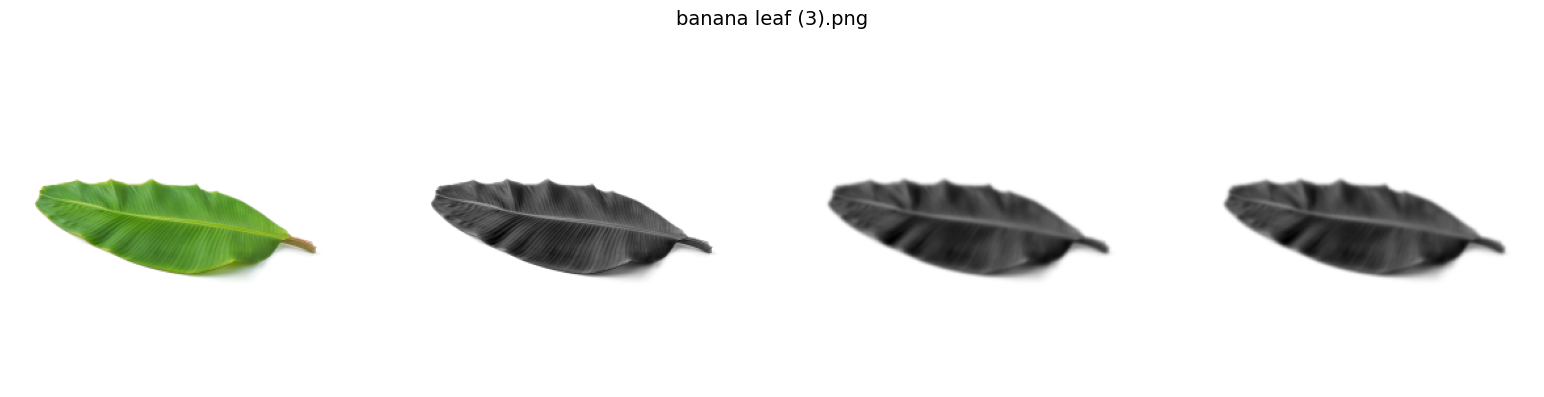

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

TARGET_SIZE = (256, 256)
folder_path = 'Leaves'

image_info = {
    'autumn leaf (1).jpg': 'autumn',
    'autumn leaf (2).png': 'autumn',
    'autumn leaf (3).png': 'autumn',
    'banana leaf (1).jpg': 'banana',
    'banana leaf (2).png': 'banana',
    'banana leaf (3).png': 'banana'
}

images = {}
for fname in image_info:
    fullpath = os.path.join(folder_path, fname)
    img = cv2.imread(fullpath)
    if img is not None:
        images[fname] = img

#Preprocessing
preprocessed = {}
for fname, orig in images.items():
    resized = cv2.resize(orig, TARGET_SIZE, interpolation=cv2.INTER_AREA)
    gray    = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5), 0)
    norm    = blurred.astype('float32') / 255.0
    preprocessed[fname] = norm

    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    fig.suptitle(fname, fontsize=14)
    axes[0].imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)); axes[0].axis('off')
    axes[1].imshow(gray, cmap='gray');    axes[1].axis('off')
    axes[2].imshow(blurred, cmap='gray'); axes[2].axis('off')
    axes[3].imshow(norm, cmap='gray');    axes[3].axis('off')
    plt.tight_layout(); plt.show()



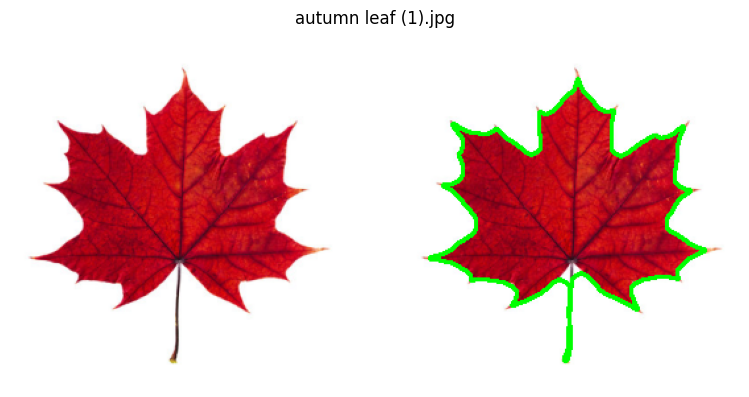

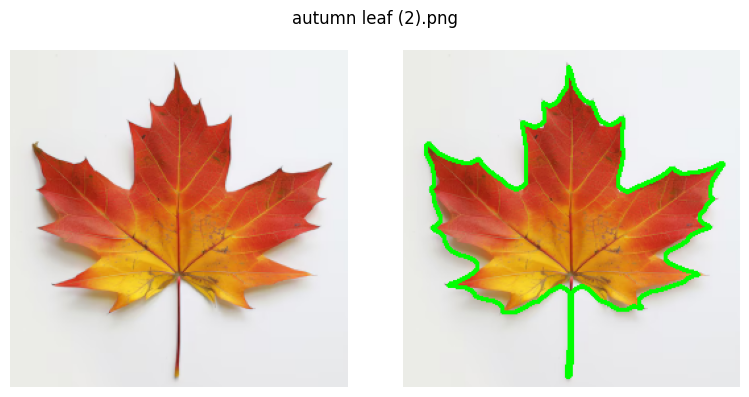

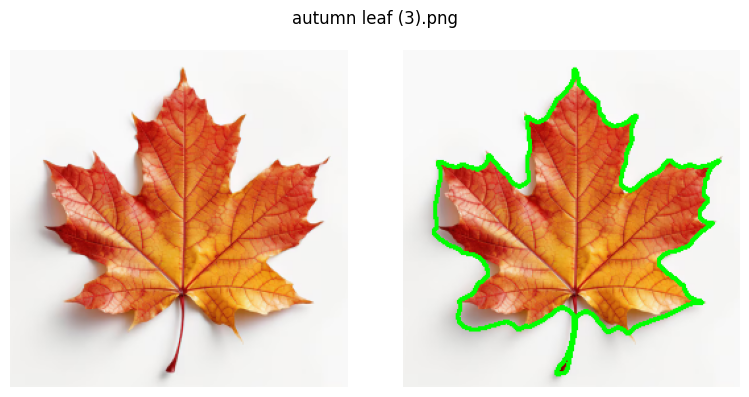

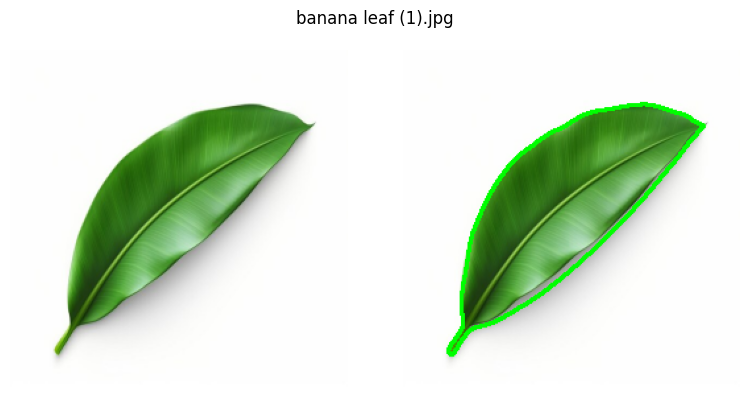

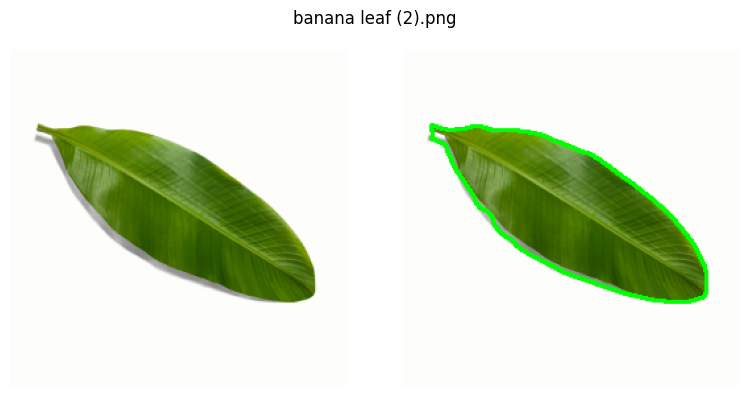

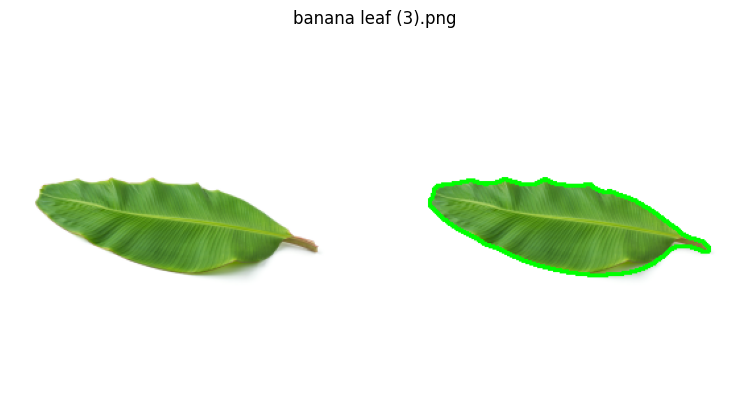

In [6]:
#@title Contour Extraction
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
contours_dict = {}
masks = {}

for fname, norm_img in preprocessed.items():
    img_u8 = (norm_img * 255).astype('uint8')
    _, thresh_inv = cv2.threshold(
        img_u8, 0, 255,
        cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
    )
    closed = cv2.morphologyEx(thresh_inv, cv2.MORPH_CLOSE, kernel, iterations=2)
    cnts, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not cnts:
        continue
    leaf_cnt = max(cnts, key=cv2.contourArea)
    contours_dict[fname] = leaf_cnt
    masks[fname] = closed



for fname, cnt in contours_dict.items():
    resized_color = cv2.resize(images[fname], TARGET_SIZE, interpolation=cv2.INTER_AREA)
    overlay = resized_color.copy()
    cv2.drawContours(overlay, [cnt], -1, (0,255,0), 2)
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(resized_color, cv2.COLOR_BGR2RGB)); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)); plt.axis('off')
    plt.suptitle(fname)
    plt.tight_layout()
    plt.show()


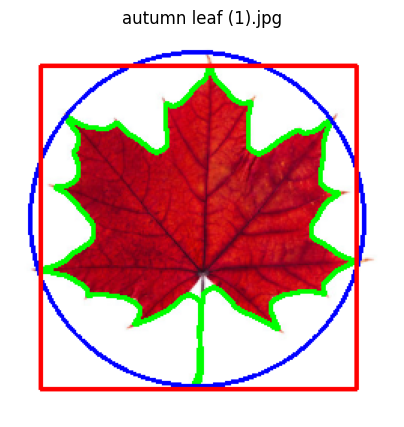

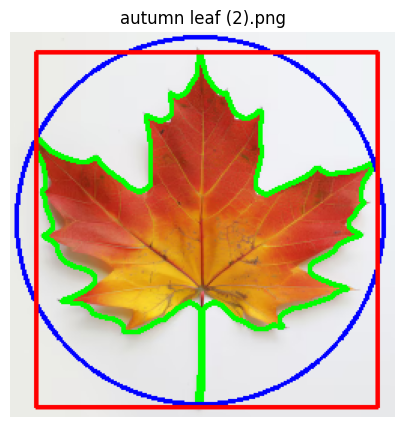

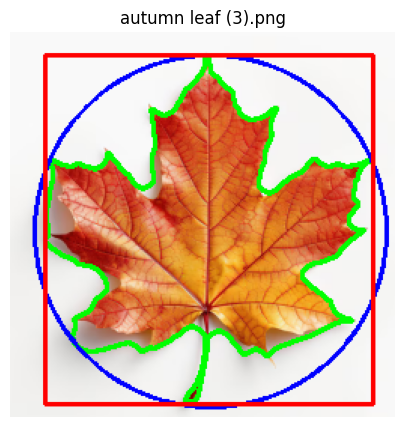

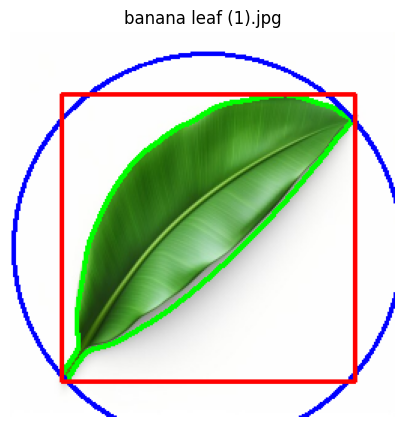

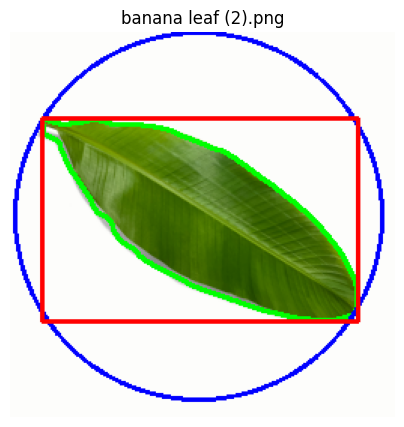

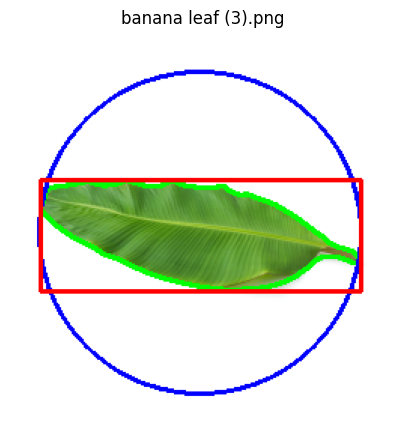

In [17]:
#@title Feature Validation
for fname, cnt in contours_dict.items():
    orig    = images[fname]
    resized = cv2.resize(orig, TARGET_SIZE, interpolation=cv2.INTER_AREA)
    overlay = resized.copy()
    cv2.drawContours(overlay, [cnt], -1, (0,255,0), 2)
    (x_c, y_c), radius = cv2.minEnclosingCircle(cnt)
    center = (int(x_c), int(y_c))
    cv2.circle(overlay, center, int(radius), (255,0,0), 2)
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(overlay, (x,y), (x+w, y+h), (0,0,255), 2)

    plt.figure(figsize=(5,5))
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(fname)
    plt.show()

Extract Feature Vector for each Image

In [ ]:
# @title Shape Features

features = []
for fname, cnt in contours_dict.items():
    label = image_info[fname]

    # Area and Perimeter
    area      = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)

    # Aspect Ratio and Extent
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w) / float(h)
    rect_area    = w * h
    extent       = float(area) / rect_area

    # Solidity
    hull      = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    solidity  = float(area) / hull_area

    # Circularity
    circularity = 4 * np.pi * area / (perimeter**2)

    features.append([
        fname, label,
        area, perimeter,
        aspect_ratio, extent,
        solidity, circularity
    ])

cols = [
    'filename','label',
    'area','perimeter',
    'aspect_ratio','extent',
    'solidity','circularity'
]
df = pd.DataFrame(features, columns=cols)
display(df)

filename   label     area    perimeter  aspect_ratio    extent  \
0  autumn leaf (1).jpg  autumn  19894.0  1013.803165      0.976744  0.440620   
1  autumn leaf (2).png  autumn  21389.5  1106.388951      0.961864  0.399266   
2  autumn leaf (3).png  autumn  24210.5  1101.241762      0.939655  0.478695   
3  banana leaf (1).jpg  banana  15576.5   611.251868      1.020942  0.418217   
4  banana leaf (2).png  banana  14855.5   572.742201      1.555556  0.524004   
5  banana leaf (3).png  banana   9561.5   501.688379      2.878378  0.606617   

   solidity  circularity  
0  0.646224     0.243234  
1  0.618909     0.219581  
2  0.684919     0.250870  
3  0.963445     0.523889  
4  0.972187     0.569087  
5  0.934744     0.477384

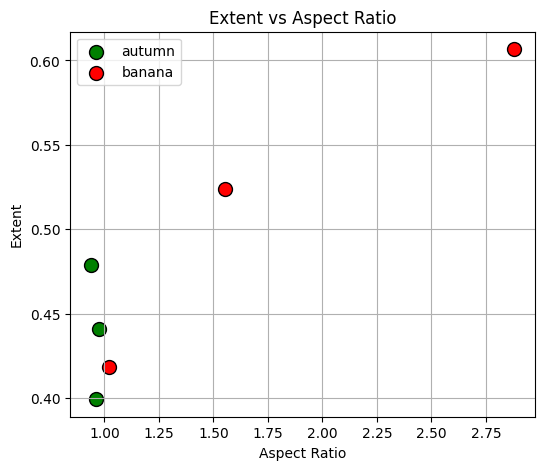

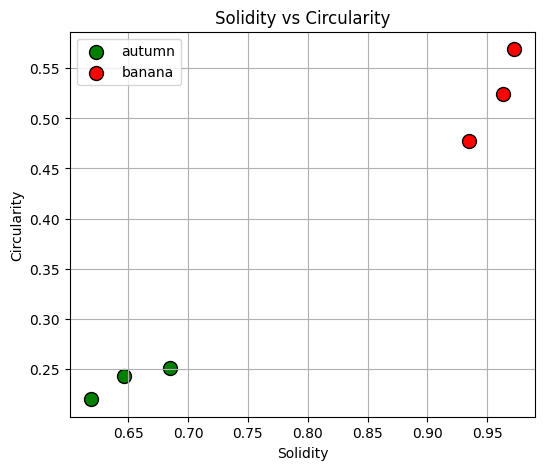

In [8]:
# Extent vs Aspect Ratio
plt.figure(figsize=(6,5))
for lbl, color in [('autumn','green'), ('banana','red')]:
    sub = df[df['label']==lbl]
    plt.scatter(sub['aspect_ratio'], sub['extent'],
                label=lbl, c=color, s=100, edgecolors='k')
plt.ylabel('Extent')
plt.xlabel('Aspect Ratio')
plt.title('Extent vs Aspect Ratio')
plt.legend()
plt.grid(True)
plt.show()


#Solidity vs Circularity
plt.figure(figsize=(6,5))
for lbl, color in [('autumn','green'), ('banana','red')]:
    sub = df[df['label']==lbl]
    plt.scatter(sub['solidity'], sub['circularity'],
                label=lbl, c=color, s=100, edgecolors='k')
plt.xlabel('Solidity')
plt.ylabel('Circularity')
plt.title('Solidity vs Circularity')
plt.legend()
plt.grid(True)
plt.show()


Classify by a Simple Model

In [9]:
# X = # Feature vectors # your code
# y = [0, 1]  # 0 for banana leaf, 1 for autumn leaf
X = df[['aspect_ratio','extent']].values
y = df['label'].map({'banana':0,'autumn':1}).values

Accuracy: 0.8333333333333334


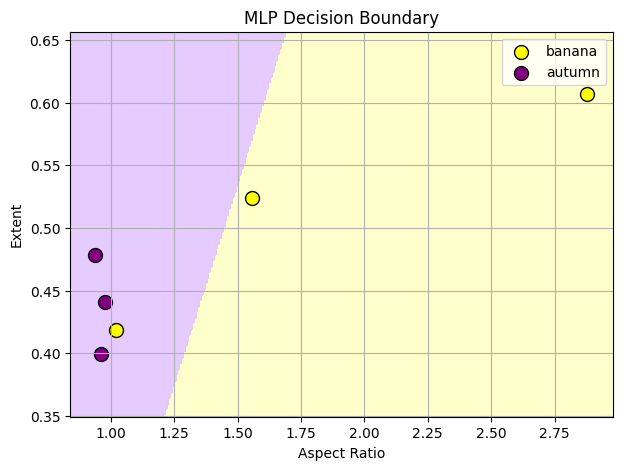

In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(), max_iter=6000, random_state=42)
mlp.fit(X, y)
print("Accuracy:", accuracy_score(y, mlp.predict(X)))

#grid
ar_min, ar_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
ex_min, ex_max = X[:,1].min() - 0.05, X[:,1].max() + 0.05
xx, yy = np.meshgrid(
    np.linspace(ar_min, ar_max, 300),
    np.linspace(ex_min, ex_max, 300)
)

Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, levels=[-0.5,0.5,1.5],
             colors=['#ffff99','#cc99ff'], alpha=0.5)

plt.scatter(X[y==0,0], X[y==0,1],
            c='yellow', edgecolors='k', s=100, label='banana')
plt.scatter(X[y==1,0], X[y==1,1],
            c='purple', edgecolors='k', s=100, label='autumn')

plt.xlabel('Aspect Ratio')
plt.ylabel('Extent')
plt.title('MLP Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


This pair yields a fairly clean linear separation (≈ 83% accuracy). A single straight boundary correctly classifies five out of six leaves, so Aspect Ratio and Extent are well suited for a simple linear classifier.

In [11]:
#Solidity , Circularity
X = df[['solidity','circularity']].values

Accuracy: 0.5


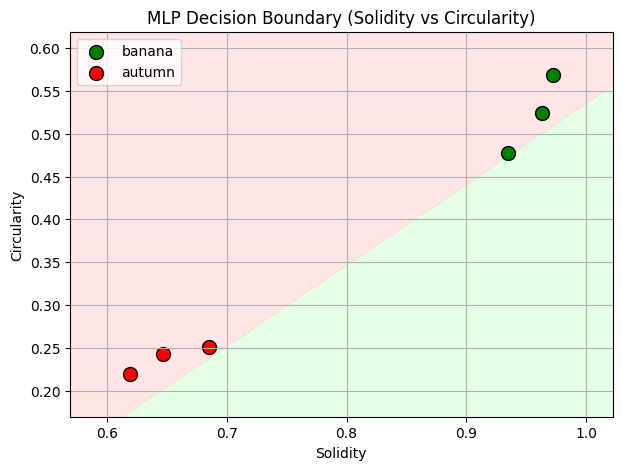

In [12]:
mlp = MLPClassifier(hidden_layer_sizes=(), max_iter=6000, random_state=42)
mlp.fit(X, y)
print("Accuracy:", accuracy_score(y, mlp.predict(X)))

#grid
sol_min, sol_max = X[:,0].min() - 0.05, X[:,0].max() + 0.05
circ_min, circ_max = X[:,1].min() - 0.05, X[:,1].max() + 0.05
xx, yy = np.meshgrid(
    np.linspace(sol_min, sol_max, 300),
    np.linspace(circ_min, circ_max, 300)
)

Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, levels=[-0.5,0.5,1.5],
             colors=['#ccffcc','#ffcccc'], alpha=0.5)

plt.scatter(X[y==0,0], X[y==0,1],
            c='green', edgecolors='k', s=100, label='banana')
plt.scatter(X[y==1,0], X[y==1,1],
            c='red',   edgecolors='k', s=100, label='autumn')

plt.xlabel('Solidity')
plt.ylabel('Circularity')
plt.title('MLP Decision Boundary (Solidity vs Circularity)')
plt.legend()
plt.grid(True)
plt.show()


Here the two classes overlap heavily (50% accuracy). Maple leaves and banana leaves share similar Solidity and Circularity values, so we cannot draw one straight line to separate them reliably.

In [13]:
X = df[['aspect_ratio','solidity']].values

Accuracy (Aspect Ratio vs Solidity): 0.6666666666666666


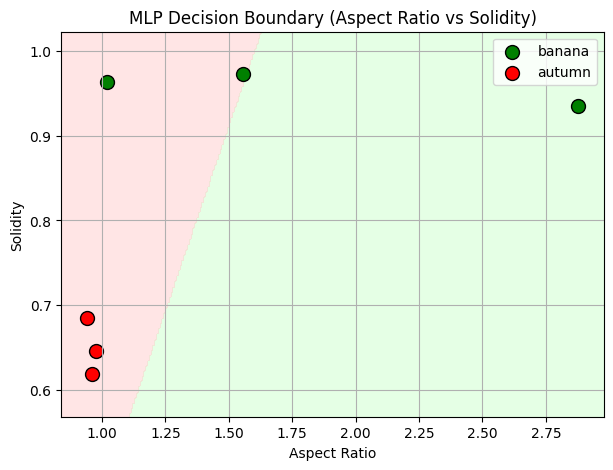

In [14]:
mlp = MLPClassifier(hidden_layer_sizes=(), max_iter=6000, random_state=42)
mlp.fit(X, y)

print("Accuracy (Aspect Ratio vs Solidity):", accuracy_score(y, mlp.predict(X)))

ar_min, ar_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
sol_min, sol_max = X[:,1].min() - 0.05, X[:,1].max() + 0.05
xx, yy = np.meshgrid(
    np.linspace(ar_min, ar_max, 300),
    np.linspace(sol_min, sol_max, 300)
)

Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, levels=[-0.5,0.5,1.5],
             colors=['#ccffcc','#ffcccc'], alpha=0.5)
plt.scatter(X[y==0,0], X[y==0,1],
            c='green', edgecolors='k', s=100, label='banana')
plt.scatter(X[y==1,0], X[y==1,1],
            c='red',   edgecolors='k', s=100, label='autumn')
plt.xlabel('Aspect Ratio')
plt.ylabel('Solidity')
plt.title('MLP Decision Boundary (Aspect Ratio vs Solidity)')
plt.legend()
plt.grid(True)
plt.show()


This combination is only moderately suitable (≈ 67% accuracy). Four of six points fall on the correct side of the line, but two end up misclassified—indicating.

In [15]:
X = df[['extent','solidity']].values

Accuracy (Extent vs Solidity): 0.5


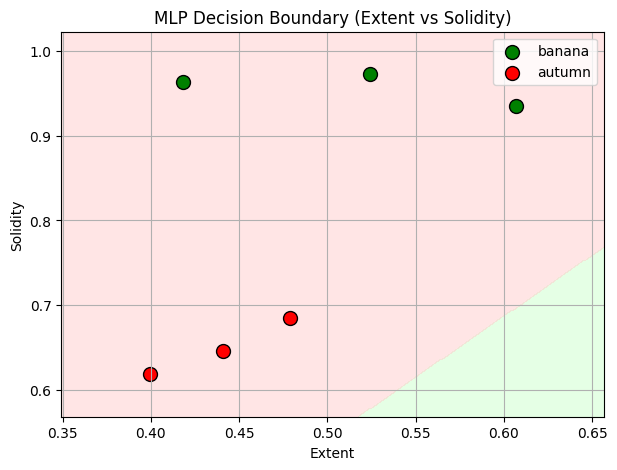

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=(), max_iter=6000, random_state=42)
mlp.fit(X, y)
print("Accuracy (Extent vs Solidity):", accuracy_score(y, mlp.predict(X)))

ext_min, ext_max = X[:,0].min() - 0.05, X[:,0].max() + 0.05
sol_min, sol_max = X[:,1].min() - 0.05, X[:,1].max() + 0.05
xx, yy = np.meshgrid(
    np.linspace(ext_min, ext_max, 300),
    np.linspace(sol_min, sol_max, 300)
)

Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, levels=[-0.5,0.5,1.5],
             colors=['#ccffcc','#ffcccc'], alpha=0.5)
plt.scatter(X[y==0,0], X[y==0,1],
            c='green', edgecolors='k', s=100, label='banana')
plt.scatter(X[y==1,0], X[y==1,1],
            c='red',   edgecolors='k', s=100, label='autumn')
plt.xlabel('Extent')
plt.ylabel('Solidity')
plt.title('MLP Decision Boundary (Extent vs Solidity)')
plt.legend()
plt.grid(True)
plt.show()

Also poor for linear separation (50% accuracy). The Extent and Solidity ranges overlap too much between classes, so a single straight decision boundary fails to distinguish them.

